   Unnamed: 0  Sentiment                                           Sentence
0           0          0  According to Gran , the company has no plans t...
1           1          1  For the last quarter of 2010 , Componenta 's n...
2           2          1  In the third quarter of 2010 , net sales incre...
3           3          1  Operating profit rose to EUR 13.1 mn from EUR ...
4           4          1  Operating profit totalled EUR 21.1 mn , up fro...


<ipython-input-5-024fb06be22a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='viridis')


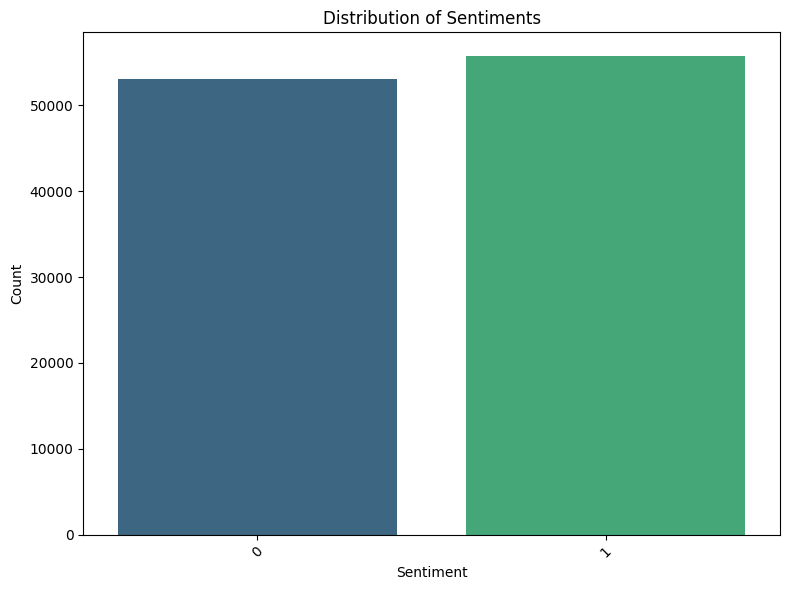

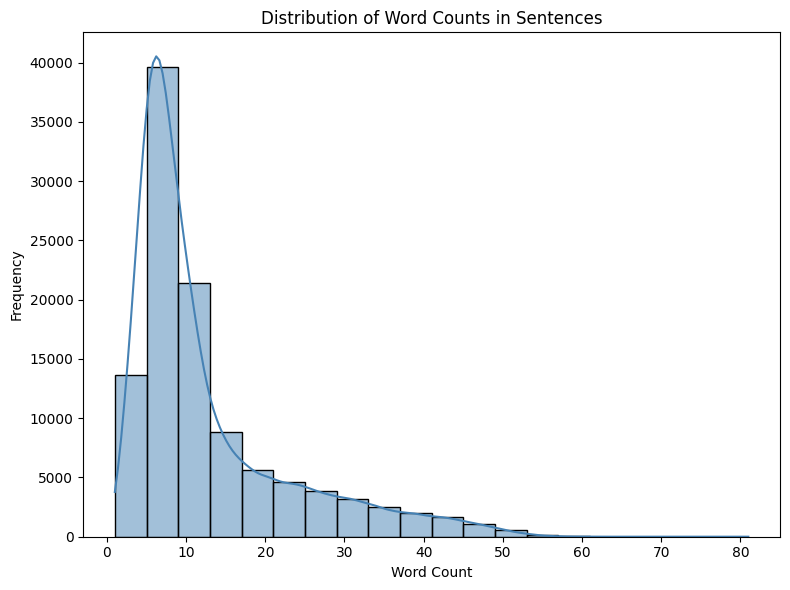

<ipython-input-5-024fb06be22a>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sentiment', y='sentence_length', palette='Set2')


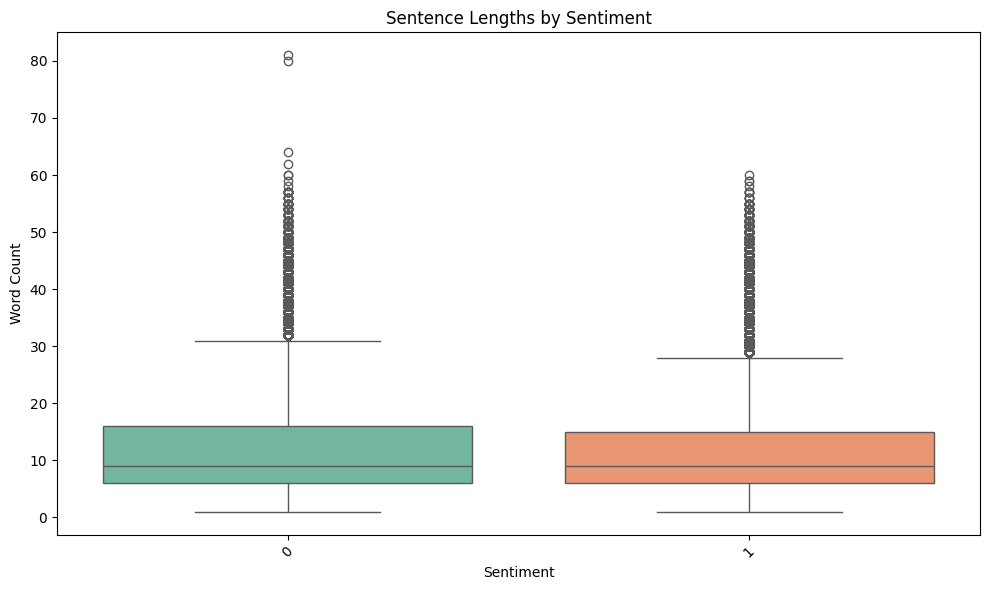

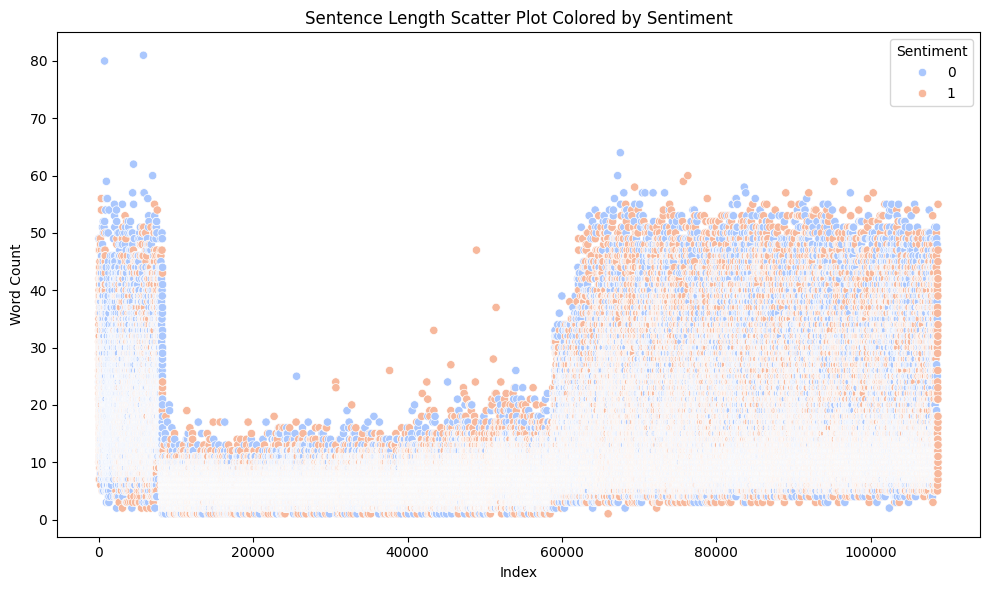

<ipython-input-5-024fb06be22a>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_length, x='Sentiment', y='sentence_length', palette='magma')


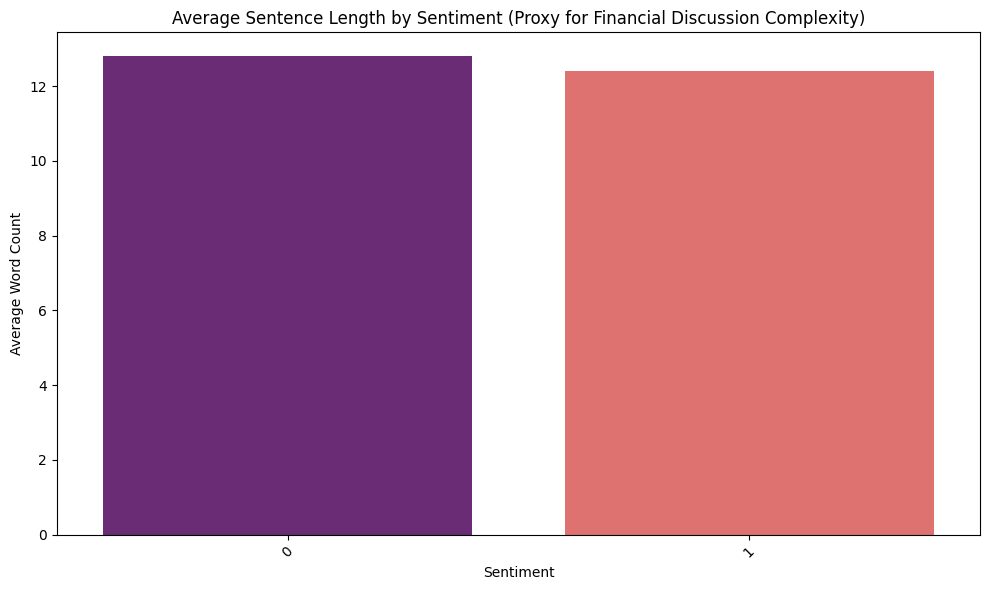

Visualizations generated successfully.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the CSV file
df = pd.read_csv('Sentiment_Stock_data.csv', encoding='utf-8')

# Display head for verification
print(df.head())

# Visualization 1: Countplot of Sentiments
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sentiment', palette='viridis')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization 2: Word Length Distribution in Sentence
# Calculate sentence lengths
df['sentence_length'] = df['Sentence'].astype(str).apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 6))
sns.histplot(df['sentence_length'], bins=20, kde=True, color='steelblue')
plt.title('Distribution of Word Counts in Sentences')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Visualization 3: Boxplot of sentence lengths by Sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Sentiment', y='sentence_length', palette='Set2')
plt.title('Sentence Lengths by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Word Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization 4: Scatter Plot - Using index as x axis, sentence length as y axis colored by sentiment
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df.index, y='sentence_length', hue='Sentiment', palette='coolwarm')
plt.title('Sentence Length Scatter Plot Colored by Sentiment')
plt.xlabel('Index')
plt.ylabel('Word Count')
plt.tight_layout()
plt.show()

# Visualization 5: Financial Analytical Visualization - If we assume sentence lengths or sentiments are proxies for financial metrics,
# we can create a bar plot for average sentence length per sentiment
avg_length = df.groupby('Sentiment')['sentence_length'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_length, x='Sentiment', y='sentence_length', palette='magma')
plt.title('Average Sentence Length by Sentiment (Proxy for Financial Discussion Complexity)')
plt.xlabel('Sentiment')
plt.ylabel('Average Word Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print('Visualizations generated successfully.')

                                            Sentence  Revenue_mEUR  \
0  According to Gran , the company has no plans t...           NaN   
1  For the last quarter of 2010 , Componenta 's n...         131.0   
2  In the third quarter of 2010 , net sales incre...           NaN   
3  Operating profit rose to EUR 13.1 mn from EUR ...           NaN   
4  Operating profit totalled EUR 21.1 mn , up fro...           NaN   

   Operating_Profit_mEUR    Year  
0                    NaN     NaN  
1                    NaN  2010.0  
2                    NaN  2010.0  
3                   13.1  2007.0  
4                   21.1  2007.0  


<ipython-input-8-66954440e5a2>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rev_by_year, x='Year', y='Revenue_mEUR', palette='Blues_d')


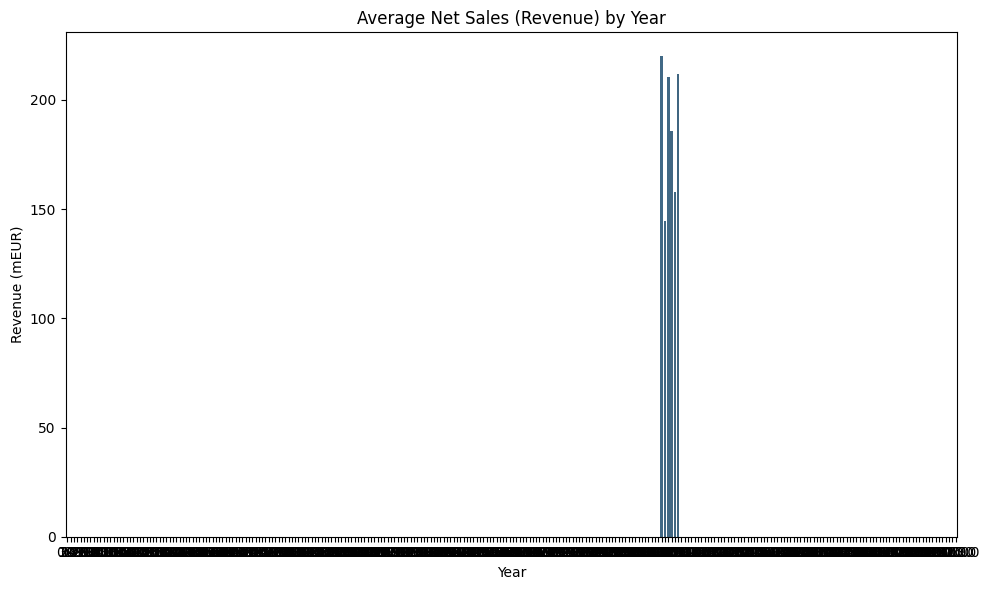

<ipython-input-8-66954440e5a2>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=profit_by_year, x='Year', y='Operating_Profit_mEUR', palette='Greens_d')


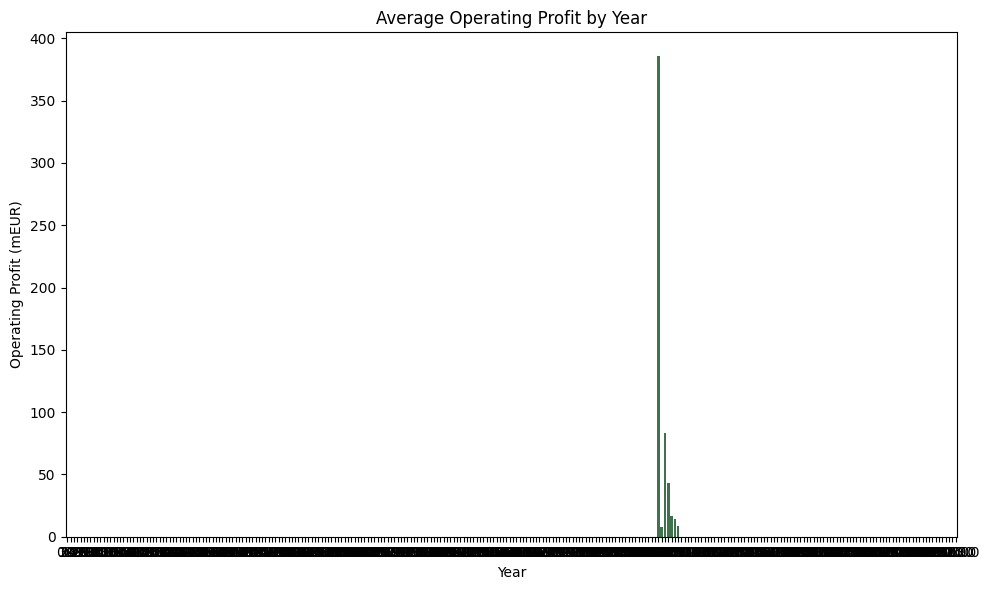

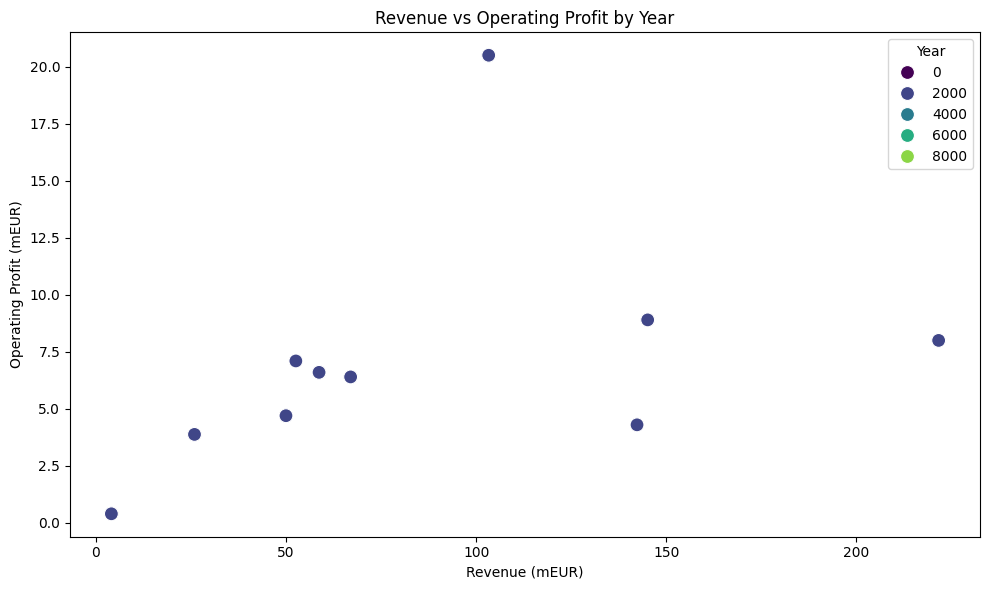

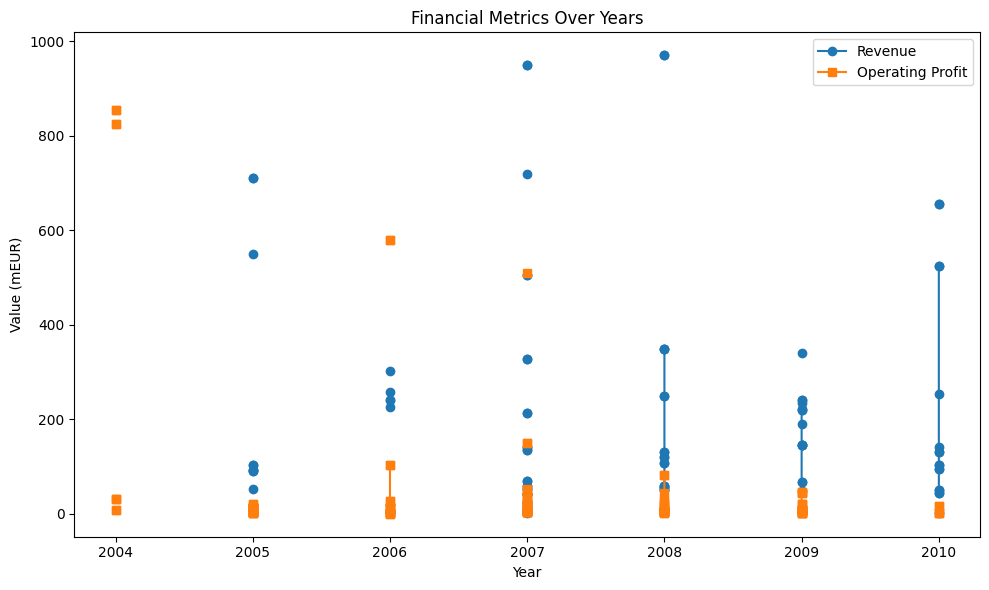

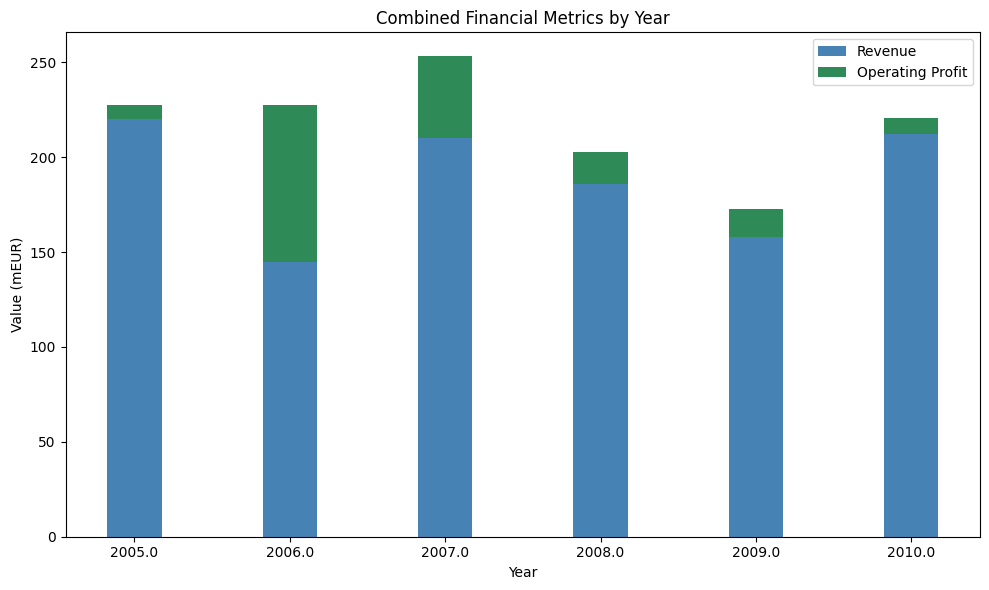

Financial visualizations generated successfully.


In [8]:
import re

# Create functions to extract financial figures from the Sentence column

def extract_value(pattern, text):
    match = re.search(pattern, text, re.IGNORECASE)
    if match:
        try:
            return float(match.group(1))
        except:
            return None
    return None

# Define patterns to extract net sales and operating profit
pattern_revenue = r'net sales[^,\.]*?EUR\s*(\d+\.?\d*)\s*m'
pattern_profit = r'operating profit[^,\.]*?EUR\s*(\d+\.?\d*)\s*m'
pattern_year = r'(\d{4})'

# Create new columns for extracted values
revenue_vals = []
profit_vals = []
year_vals = []

for text in df['Sentence'].astype(str):
    revenue = extract_value(pattern_revenue, text)
    profit = extract_value(pattern_profit, text)
    year_match = re.search(pattern_year, text)
    year = int(year_match.group(1)) if year_match else None
    revenue_vals.append(revenue)
    profit_vals.append(profit)
    year_vals.append(year)


df['Revenue_mEUR'] = revenue_vals
df['Operating_Profit_mEUR'] = profit_vals
df['Year'] = year_vals

# Show the updated dataframe head
print(df[['Sentence', 'Revenue_mEUR', 'Operating_Profit_mEUR', 'Year']].head())

# Visualization 1: Bar plot of Revenue by Year (using average revenue per year)
rev_by_year = df.groupby('Year', as_index=False)['Revenue_mEUR'].mean()
plt.figure(figsize=(10,6))
sns.barplot(data=rev_by_year, x='Year', y='Revenue_mEUR', palette='Blues_d')
plt.title('Average Net Sales (Revenue) by Year')
plt.xlabel('Year')
plt.ylabel('Revenue (mEUR)')
plt.tight_layout()
plt.show()

# Visualization 2: Bar plot of Operating Profit by Year
profit_by_year = df.groupby('Year', as_index=False)['Operating_Profit_mEUR'].mean()
plt.figure(figsize=(10,6))
sns.barplot(data=profit_by_year, x='Year', y='Operating_Profit_mEUR', palette='Greens_d')
plt.title('Average Operating Profit by Year')
plt.xlabel('Year')
plt.ylabel('Operating Profit (mEUR)')
plt.tight_layout()
plt.show()

# Visualization 3: Scatter plot of Revenue vs Operating Profit, color-coded by Year
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Revenue_mEUR', y='Operating_Profit_mEUR', hue='Year', palette='viridis', s=100)
plt.title('Revenue vs Operating Profit by Year')
plt.xlabel('Revenue (mEUR)')
plt.ylabel('Operating Profit (mEUR)')
plt.tight_layout()
plt.show()

# Visualization 4: Time series line plot (if there are multiple data points over a year)
# We'll sort the data by Year and use row index as a proxy
df_sorted = df.sort_values('Year')
plt.figure(figsize=(10,6))
plt.plot(df_sorted['Year'], df_sorted['Revenue_mEUR'], marker='o', label='Revenue')
plt.plot(df_sorted['Year'], df_sorted['Operating_Profit_mEUR'], marker='s', label='Operating Profit')
plt.title('Financial Metrics Over Years')
plt.xlabel('Year')
plt.ylabel('Value (mEUR)')
plt.legend()
plt.tight_layout()
plt.show()

# Visualization 5: Combined bar plot for Revenue and Operating Profit by Year
fig, ax = plt.subplots(figsize=(10,6))
width = 0.35
x = rev_by_year['Year'].astype(str)

ax.bar(x, rev_by_year['Revenue_mEUR'], width, label='Revenue', color='steelblue')
ax.bar(x, profit_by_year['Operating_Profit_mEUR'], width, bottom=rev_by_year['Revenue_mEUR'], label='Operating Profit', color='seagreen')

ax.set_title('Combined Financial Metrics by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Value (mEUR)')
ax.legend()
plt.tight_layout()
plt.show()

print('Financial visualizations generated successfully.')